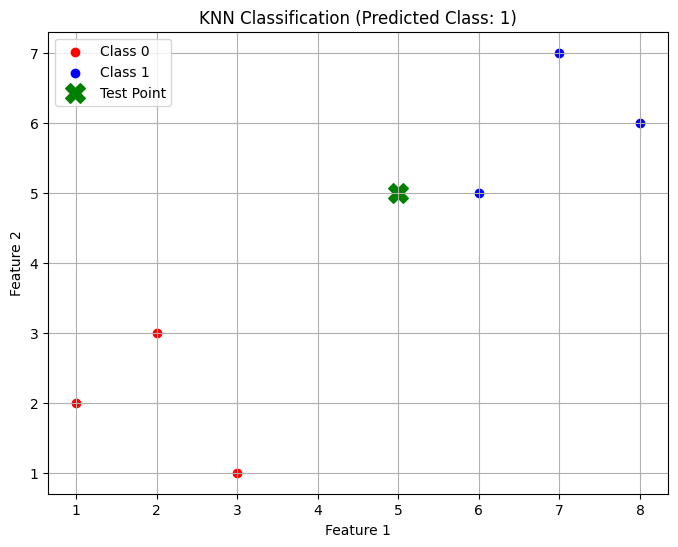

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def euclidean_distance(x1, x2):
    # This line should be indented to be part of the function
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

X_train = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 7], [8, 6]])
y_train = np.array([0, 0, 0, 1, 1, 1])
X_test = np.array([[5, 5]])

knn = KNN(k=3)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

plt.figure(figsize=(8, 6))
for i in range(len(X_train)):
    plt.scatter(X_train[i][0], X_train[i][1],
                color='red' if y_train[i] == 0 else 'blue',
                label=f"Class {y_train[i]}" if f"Class {y_train[i]}" not in plt.gca().get_legend_handles_labels()[1] else "")

plt.scatter(X_test[0][0], X_test[0][1], color='green', s=200, marker='X', label='Test Point')

plt.title(f"KNN Classification (Predicted Class: {prediction[0]})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)